In [1]:
import pandas as pd
import numpy as np
import scipy as sp

In [2]:
data=pd.read_csv('data/fj1.csv', dtype={"resolution": str, "gsubname2":str, "gname3":str, "gsubname3":str, "claimmode3_txt":str, "weaptype4_txt":str, "weapsubtype4_txt":str, "divert":str, "kidhijcountry":str})

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114183 entries, 0 to 114182
Columns: 135 entries, eventid to related
dtypes: float64(54), int64(23), object(58)
memory usage: 117.6+ MB


In [4]:
data['propextent'].fillna(4, inplace = True)
data.loc[ data['propextent'] == -9, 'propextent'] = 4

data['nkill'].fillna(0, inplace = True)
data['nkillter'].fillna(0, inplace = True)
data['nwound'].fillna(0, inplace = True)
data['nwoundte'].fillna(0, inplace = True)

data['kill_and_wound'] = (data['nkill'] - data['nkillter'])*0.7 + (data['nwound'] - data['nwoundte'])*0.3

In [5]:
data['kill_and_wound'].max()

3422.3

In [6]:
data['pre_faith'] = data['propextent']*80 + data['kill_and_wound']/10

In [7]:
maxf = data['pre_faith'].max()
maxf

429.9

In [8]:
minf = data['pre_faith'].min()
minf

82.98

In [9]:
data['faith'] = (data['pre_faith'] - minf)/(maxf - minf)

In [10]:
data['faith']

0         0.684538
1         0.683472
2         0.683414
3         0.452612
4         0.683299
5         0.683212
6         0.683212
7         0.683212
8         0.683299
9         0.686210
10        0.694685
11        0.683385
12        0.452612
13        0.683212
14        0.683212
15        0.683212
16        0.683212
17        0.683212
18        0.683414
19        0.687017
20        0.688458
21        0.683616
22        0.683616
23        0.683212
24        0.683414
25        0.688257
26        0.683212
27        0.723567
28        0.683212
29        0.683212
            ...   
114153    0.452813
114154    0.683385
114155    0.683212
114156    0.683385
114157    0.452612
114158    0.452612
114159    0.683212
114160    0.683212
114161    0.683645
114162    0.683414
114163    0.684798
114164    0.684481
114165    0.688055
114166    0.683212
114167    0.683875
114168    0.453620
114169    0.452612
114170    0.683501
114171    0.683212
114172    0.683212
114173    0.453246
114174    0.

In [11]:
data.loc[ data['faith'] < 0.2, 'level_faith'] = 5
data.loc[ (data['faith'] >= 0.2) & (data['faith'] < 0.4), 'level_faith'] = 4
data.loc[ (data['faith'] >= 0.4) & (data['faith'] < 0.6), 'level_faith'] = 3
data.loc[ (data['faith'] >= 0.6) & (data['faith'] < 0.8), 'level_faith'] = 2
data.loc[ data['faith'] >= 0.8, 'level_faith'] = 1

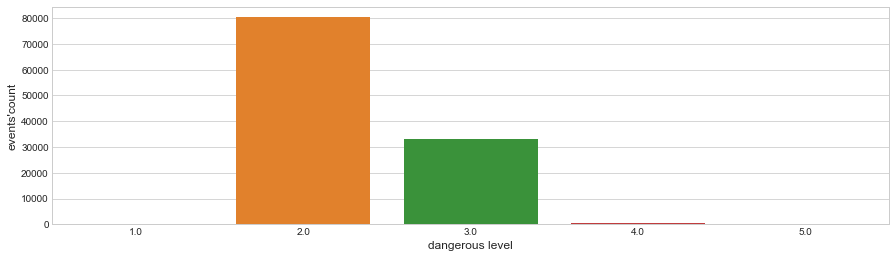

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

int_feature=['level_faith']
for feature in int_feature:
    features = data[feature].astype(str)
    plat = features.value_counts()
    
    plt.figure(figsize=(15,4))
    sns.barplot(plat.index, plat.values)
    plt.xlabel('dangerous level', fontsize=12)
    plt.ylabel('events\'count', fontsize=12)

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['le_faith'] = le.fit_transform(data['faith']) 

vecc = data['le_faith'].value_counts()[:4]
vec = vecc.index.tolist()
vec = sorted(vec)

In [14]:
vecc

756    29263
185    13283
761    11077
758     4613
Name: le_faith, dtype: int64

In [15]:
vec

[185, 756, 758, 761]

In [16]:
list(le.inverse_transform(vec))

C:\Users\caijiayue\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0.4526115530958146, 0.6832122679580307, 0.683298743226104, 0.6834140435835351]

In [17]:
data.loc[ data['le_faith'] < vec[0], 'level_faith2'] = 5
data.loc[ (data['le_faith'] >= vec[0]) & (data['le_faith'] < vec[1]), 'level_faith2'] = 4
data.loc[ (data['le_faith'] >= vec[1]) & (data['le_faith'] < vec[2]), 'level_faith2'] = 3
data.loc[ (data['le_faith'] >= vec[2]) & (data['le_faith'] < vec[3]), 'level_faith2'] = 2
data.loc[ data['le_faith'] >= vec[3], 'level_faith2'] = 1

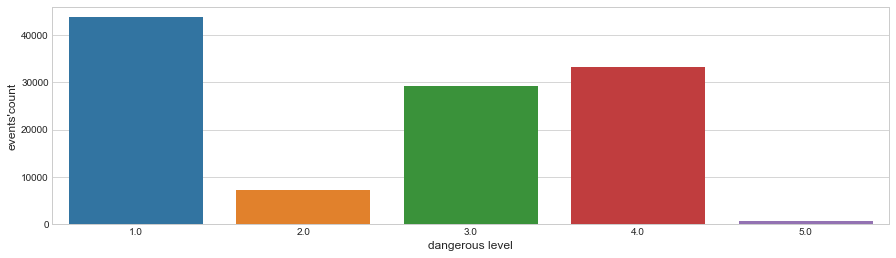

In [18]:
int_feature=['level_faith2']
for feature in int_feature:
    features = data[feature].astype(str)
    plat = features.value_counts()
    
    plt.figure(figsize=(15,4))
    sns.barplot(plat.index, plat.values)
    plt.xlabel('dangerous level', fontsize=12)
    plt.ylabel('events\'count', fontsize=12)

In [19]:
pre1_3 = pd.DataFrame({
        'eventid': data['eventid'],
        'faith': data['faith'],
        'level_faith': data['level_faith']
    })

In [20]:
pre1_3.to_csv('data/pre1_3.csv', index=False)